# **Project**

I would like to answer two questions. First if there is any correlation between the height and the first 5 picks of every NBA draft since 1963. The second is to see if there is any significant difference in age between players drafted before the 2000s and the players drafted after 2000s.




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import pandas and read in the GDrive-mounted CSV
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind 
import warnings

warnings.filterwarnings('ignore')  

    
players_df = pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/all_seasons.csv')
players_df.info() # see information about dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [ ]:
players_df.head(10) #see first 10 rows

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
7,7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990,1,...,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97
8,8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992,Undrafted,...,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97
9,9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991,2,...,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-97


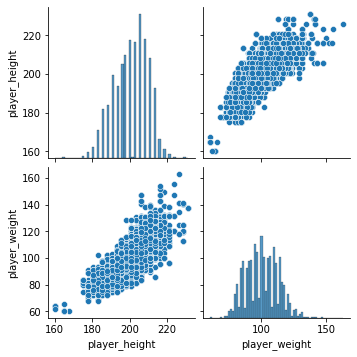

In [ ]:
sns.pairplot(players_df, vars = ['player_height', 'player_weight'])

# **Hypothesis** #**1**

**Hypothesis:** undrafted players are smaller than drafted players

In [ ]:
# creating a variable (undrafted) with all players undrafted in the past two decades
undrafted = players_df[(players_df.draft_number == 'Undrafted')]


In [ ]:
# creating a variable (all_drafted) with all the players drafted in the past two decades
all_drafted= players_df[(players_df.draft_number != 'Undrafted')]


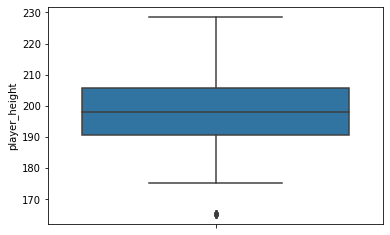

In [ ]:
sns.boxplot(y=undrafted['player_height'])

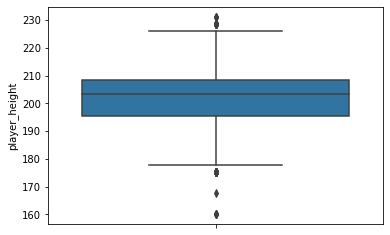

In [ ]:
sns.boxplot(y=all_drafted['player_height'])

run a two sample t-test to see if there is significant difference in height between 
top_drafted and bottom_drafted

In [ ]:
stats.ttest_ind(undrafted['player_height'], all_drafted['player_height'])

Ttest_indResult(statistic=-17.348729645996542, pvalue=1.248764127086546e-66)

# **Summary of findings for hypothesis #1**

the t-test shows there is a significant difference between the heights of undrafted players and the drafted players. This mean that NBA teams look for size when it comes to draft a player. **Hypothesis supported**

# **Hypothesis #2**

**Hypothesis:** top drafted players are heavier than the other players drafted not in the top 5 and undrafted

In [ ]:
# creating a variable (top_drafted) with players drafted in the top 5 of the first round
top_drafted= players_df[(players_df.draft_number == '1')| (players_df.draft_number == '2') | (players_df.draft_number == '3')| (players_df.draft_number == '4') | (players_df.draft_number == '5')& (players_df.draft_round == '1')]

In [ ]:
# creating a variable (bottom_drafted) with all the players drafted and undrafted not including top 5 of the first round
bottom_drafted= players_df[(players_df.draft_number != '1')| (players_df.draft_number != '2') | (players_df.draft_number != '3')| (players_df.draft_number != '4') | (players_df.draft_number != '5')& (players_df.draft_round == '1')]

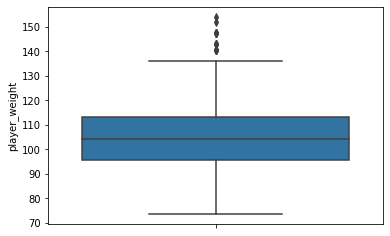

In [ ]:
sns.boxplot(y=top_drafted['player_weight'])

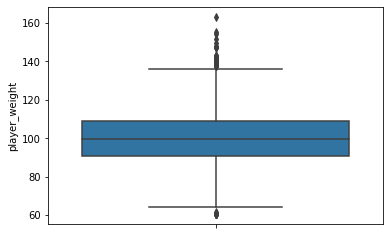

In [ ]:
sns.boxplot(y=bottom_drafted['player_weight'])

run a two sample t-test to see if there is significant difference in weight between top_drafted and bottom_drafted

In [ ]:
stats.ttest_ind(top_drafted['player_weight'], bottom_drafted['player_weight'])

Ttest_indResult(statistic=10.870823634435421, pvalue=2.043954818820574e-27)

# **Summary of findings for hypothesis #2**

the t-test shows a significant difference between the weights of the top and bottom players drafted. this means that top drafted players are heavier than the other players drafted lower and undrafted. **Hypothesis supported**

# **Recommendation**

After this finding, I would suggest NBA teams need to pay attention when drafting players to ensure the height and weight are at least the same or close than the players drafted in the top 5.